# 00 설정

In [51]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 01 데이터 입력
가상 데이터 100개를 작성

In [52]:
data = [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3]]

# 데이터프레임화
df = pd.DataFrame(data=data,columns=['x1','x2','x3','x4'])
df

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


# 02 feature가 1개인 경우
## 02-1 선형 회귀

In [53]:
X = np.array(df['x4']).reshape(-1, 1)
y = np.array(df['x1']).reshape(-1, 1)

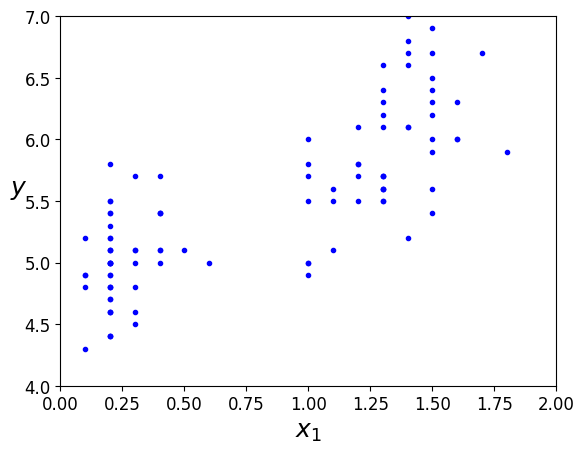

In [54]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 4, 7])
plt.show()

In [55]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.76630846],
       [0.89655412]])

In [56]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.76630846],
       [6.55941671]])

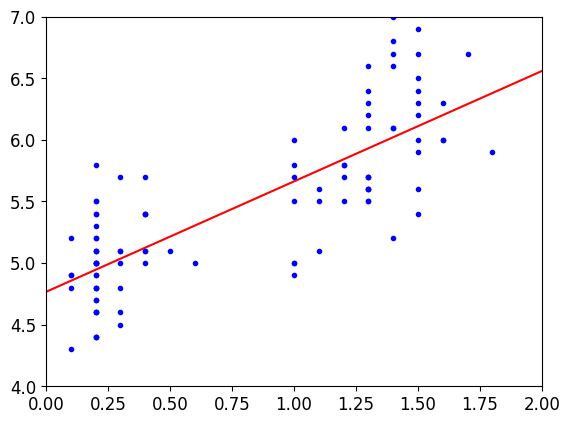

In [57]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,4,7])
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.76630846]), array([[0.89655412]]))

따라서 feature가 1개인 모델의 선형 방정식은
$
y = 4.76630846 + 0.89655412{x}
$
이다

## 02-2 경사 하강법
### 02-2-1 배치 경사 하강법

In [59]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta 

array([[4.76630846],
       [0.89655412]])

In [67]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 100
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

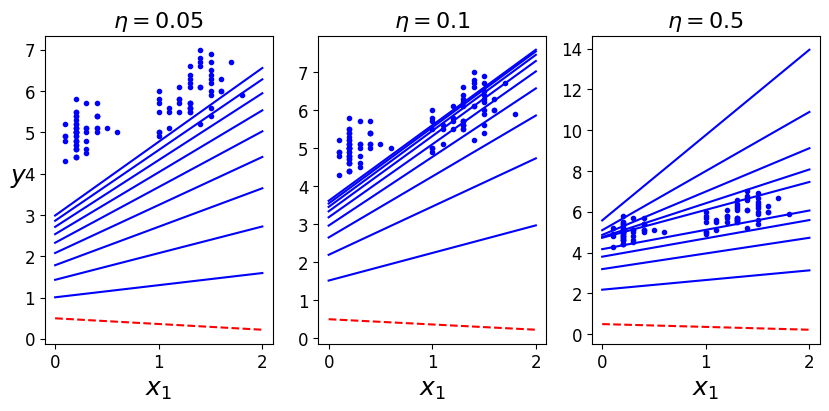

In [68]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.05)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### 02-2-2 확률적 경사 하강법

In [64]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

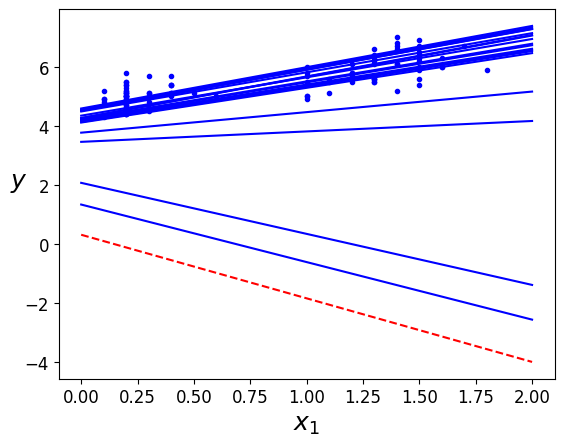

In [66]:
n_epochs = 50
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.show()                                           

In [69]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [70]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.05, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.05, penalty=None, random_state=42)

In [71]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.71852981]), array([0.95447445]))

### 02-2-3 미니배치 경사 하강법

In [72]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.80929634],
       [0.93625917]])

In [73]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

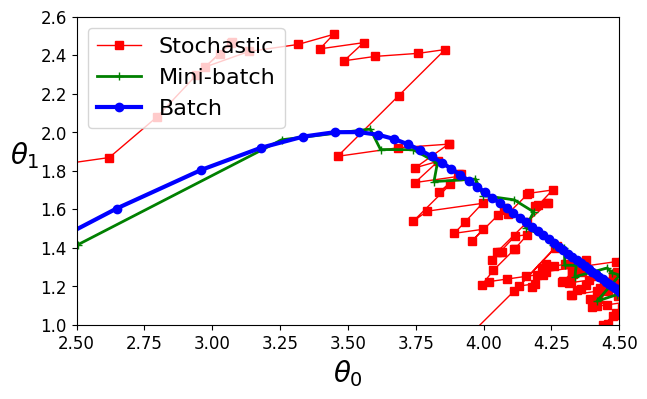

In [74]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 1.0, 2.6])
plt.show()

### 02-2-4 배치, 확률, 미니배치 경사하강법 결과 비교

In [75]:
print(theta_path_bgd[-1])
print(theta_path_sgd[-1])
print(theta_path_mgd[-1])

[[4.72748101]
 [0.93704594]]
[[4.74182764]
 [0.90624075]]
[[4.80929634]
 [0.93625917]]


## 02-3 다항 회귀

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m = 100
X = np.array(df['x4']).reshape(-1, 1)
y = np.array(df['x1']).reshape(-1, 1)

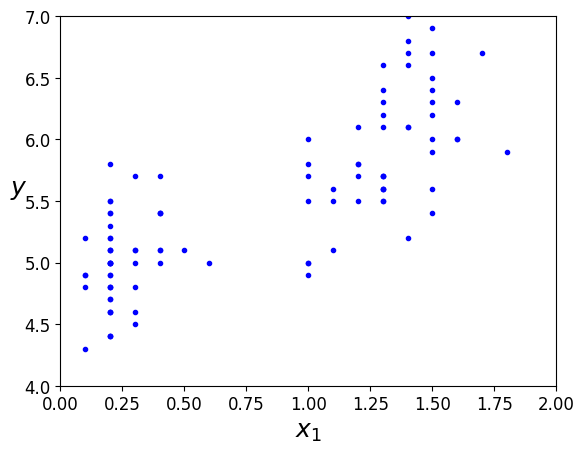

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 4, 7])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.2]), array([0.2 , 0.04]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.86995885]), array([[0.42090491, 0.28930396]]))

그림 저장: quadratic_predictions_plot


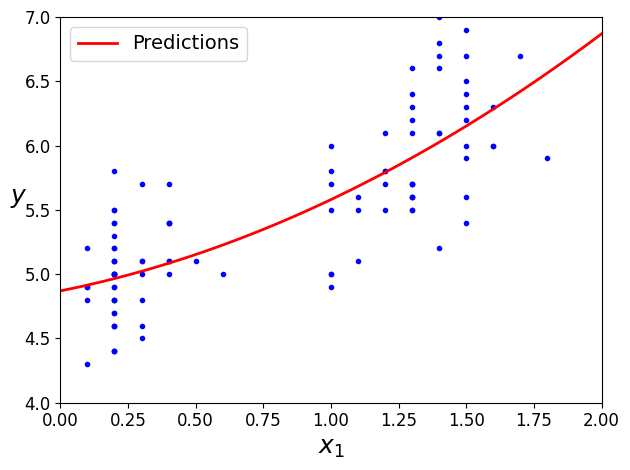

In [ ]:
X_new=np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 4, 7])
save_fig("quadratic_predictions_plot")
plt.show()

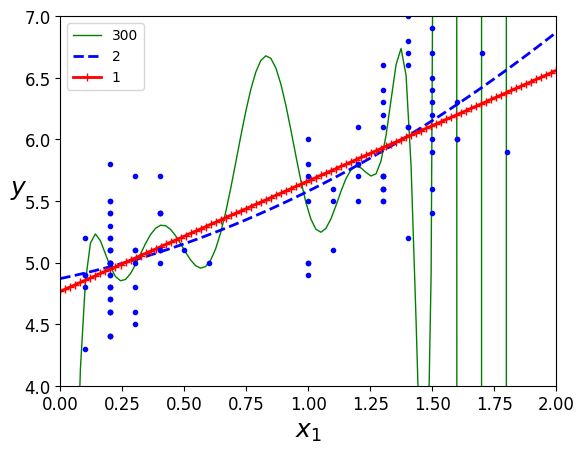

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 4, 7])
plt.show()

### 02-3-1 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

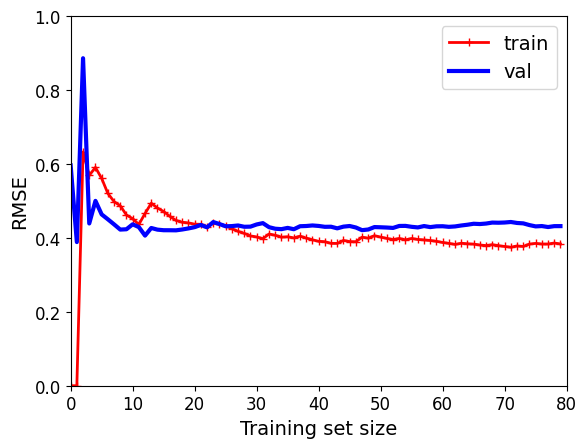

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 1])                         
plt.show()                                      

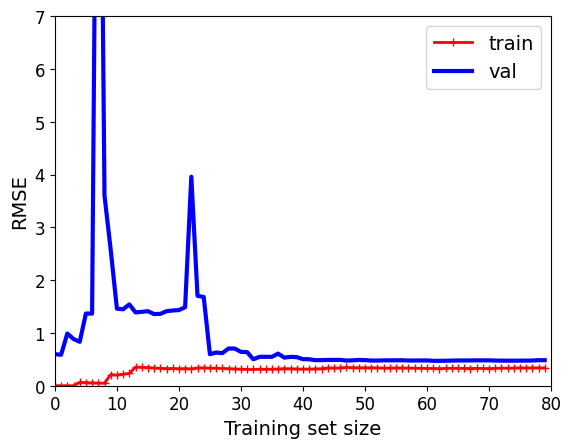

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 7])           
plt.show()                        

# 03 feature가 2개인 경우
## 03-1 선형 회귀

In [ ]:
X2 = np.array(df[['x3','x4']])
y2 = np.array(df['x1']).reshape(-1, 1)

X_b2 = np.c_[np.ones((100, 1)), X2]
theta_best2 = np.linalg.inv(X_b2.T.dot(X_b2)).dot(X_b2.T).dot(y2)
theta_best2

array([[ 4.39057873],
       [ 0.42374256],
       [-0.16781958]])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y2)
lin_reg.intercept_, lin_reg.coef_

(array([4.39057873]), array([[ 0.42374256, -0.16781958]]))

따라서 feature가 2개인 모델의 선형 방정식은
$
y = 4.39057873 + 0.42374256{x}_1 - 0.16781958{x}_2
$
이다

## 03-2 경사 하강법
### 03-2-1 배치 경사 하강법

In [ ]:
theta_path_bgd = []

eta = 0.05
n_iterations = 2000
m = 100

theta = np.random.randn(3,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b2.T.dot(X_b2.dot(theta) - y2)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

theta 

array([[ 4.38249329],
       [ 0.43329656],
       [-0.19241543]])

In [ ]:
theta

array([[ 4.38249329],
       [ 0.43329656],
       [-0.19241543]])

### 03-2-2 확률적 경사 하강법

In [ ]:
theta_path_sgd = []
m = len(X_b2)
np.random.seed(42)

In [ ]:
n_epochs = 100
t0, t1 = 5, 500 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(3,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b2[random_index:random_index+1]
        yi = y2[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

theta                                       

array([[ 4.32400291],
       [ 0.4803126 ],
       [-0.32198355]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X2, y2.ravel())

SGDRegressor(eta0=0.1, max_iter=2000, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13737613]), array([ 0.65876491, -0.87295926]))

### 03-2-3 미니배치 경사 하강법

In [ ]:
theta_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(3,1)

t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b2[shuffled_indices]
    y_shuffled = y2[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[ 4.23745855],
       [ 0.59351173],
       [-0.58224926]])

### 03-2-4 배치, 확률, 미니배치 경사하강법 결과 비교

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [ ]:
print(theta_path_bgd[-1])
print(theta_path_sgd[-1])
print(theta_path_mgd[-1])

[[ 4.38249329]
 [ 0.43329656]
 [-0.19241543]]
[[ 4.32400291]
 [ 0.4803126 ]
 [-0.32198355]]
[[ 4.23745855]
 [ 0.59351173]
 [-0.58224926]]


## 03-3 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

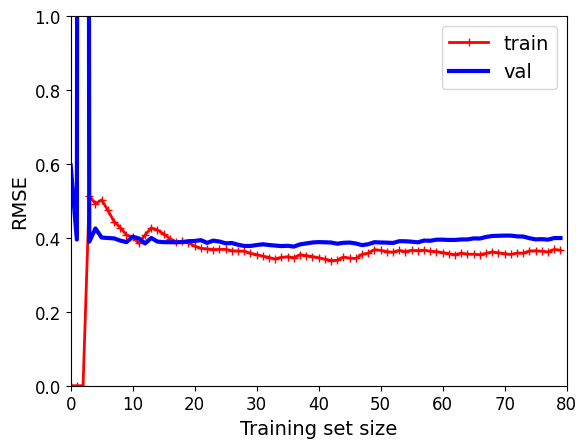

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X2, y2)
plt.axis([0, 80, 0, 1])                         
plt.show()                                      